DBSCAN 

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [24]:
df = pd.read_csv(r"D:\working\Supervised and Unsupervised learning\unsupervised\clustering\cluster_data.csv")

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [26]:
def find_optimal_epsilon(X, k=2):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, _ = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)[:,1]
    plt.plot(distances)
    plt.title('K-distance Graph (k=2)')
    plt.ylabel('Distance to k-th nearest neighbor')
    plt.xlabel('Points sorted by distance')
    plt.grid()
    plt.show()
    return distances[-3]

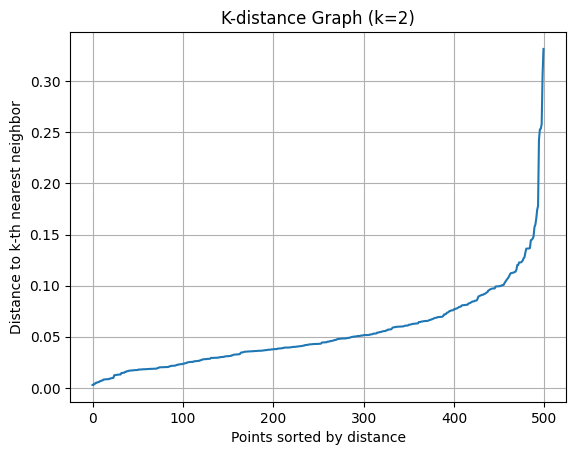

Suggested epsilon based on k-distance graph: 0.26


In [27]:
suggested_eps = find_optimal_epsilon(X)
print(f"Suggested epsilon based on k-distance graph: {suggested_eps:.2f}")

In [28]:
eps = 0.5  
min_samples = 2  

In [29]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)


In [30]:
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 2
Number of noise points: 0


In [31]:
if n_clusters > 1:
    score = silhouette_score(X, clusters)
    print(f"Silhouette Coefficient: {score:.2f}")

Silhouette Coefficient: 0.65


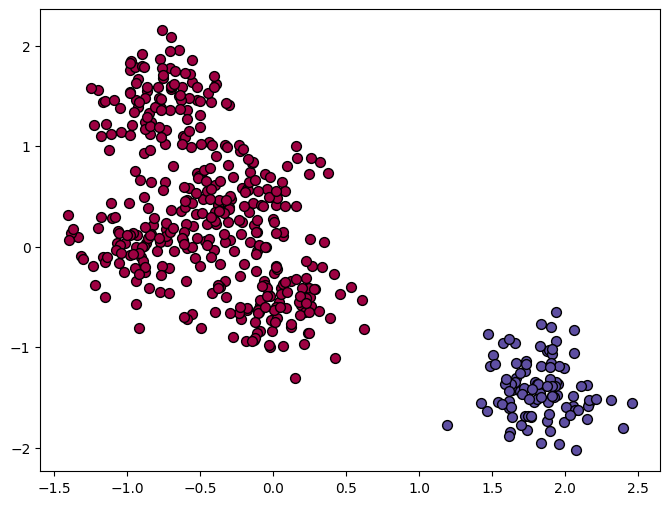

In [32]:
plt.figure(figsize=(8, 6))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]
        label = 'Noise'
    else:
        label = f'Cluster {k}'
    
    class_member_mask = (clusters == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, edgecolor='k', label=label)



C:\Users\shreelakshmi.g\AppData\Local\Temp\ipykernel_14884\2225235836.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


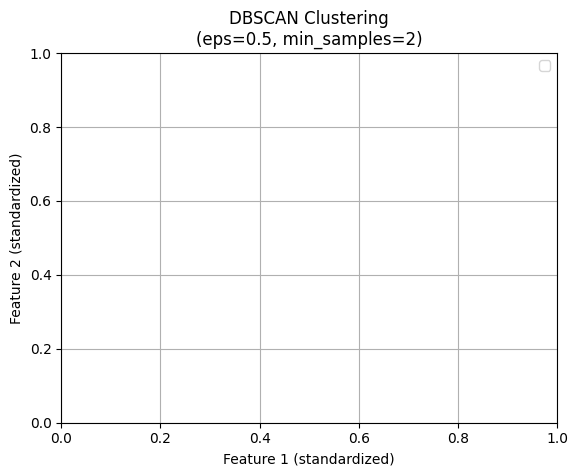

In [33]:
plt.title(f'DBSCAN Clustering\n(eps={eps}, min_samples={min_samples})')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.grid(True)
plt.show() 